In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('E_Commerce.csv')

In [3]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
print(df.columns)

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')


In [5]:
df = df.drop(columns=['ID'])

In [6]:
mean_values = df.mean(numeric_only=True).to_frame(name='Mean')
print(mean_values)

                            Mean
Customer_care_calls     4.054459
Customer_rating         2.990545
Cost_of_the_Product   210.196836
Prior_purchases         3.567597
Discount_offered       13.373216
Weight_in_gms        3634.016729
Reached.on.Time_Y.N     0.596691


In [7]:
median_values = df.median(numeric_only=True).to_frame(name='Median')
print(median_values)

                     Median
Customer_care_calls     4.0
Customer_rating         3.0
Cost_of_the_Product   214.0
Prior_purchases         3.0
Discount_offered        7.0
Weight_in_gms        4149.0
Reached.on.Time_Y.N     1.0


In [8]:
mode_values = df.mode().iloc[0].to_frame(name='Mode')
print(mode_values)

                     Mode
Warehouse_block         F
Mode_of_Shipment     Ship
Customer_care_calls     4
Customer_rating         3
Cost_of_the_Product   245
Prior_purchases         3
Product_importance    low
Gender                  F
Discount_offered       10
Weight_in_gms        4883
Reached.on.Time_Y.N     1


In [9]:
std_values = df.std(numeric_only=True).to_frame(name='Std')
print(std_values)

                             Std
Customer_care_calls     1.141490
Customer_rating         1.413603
Cost_of_the_Product    48.063272
Prior_purchases         1.522860
Discount_offered       16.205527
Weight_in_gms        1635.377251
Reached.on.Time_Y.N     0.490584


In [10]:
missing_values = df.isnull().sum()

In [11]:
missing_values = df.isnull().sum()
print(missing_values)

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


In [12]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Warehouse_block, Mode_of_Shipment, Customer_care_calls, Customer_rating, Cost_of_the_Product, Prior_purchases, Product_importance, Gender, Discount_offered, Weight_in_gms, Reached.on.Time_Y.N]
Index: []


In [13]:
df = df.drop_duplicates()

In [14]:
print("Duplicates after removal:", df.duplicated().sum())

Duplicates after removal: 0


In [15]:
print(df.dtypes)

Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender']) 

In [18]:
print(df[['Gender']].head())

   Gender
0       0
1       1
2       1
3       1
4       0


In [19]:
print(df.head())
print(df.info())


  Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0               D           Flight                    4                2   
1               F           Flight                    4                5   
2               A           Flight                    2                2   
3               B           Flight                    3                3   
4               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance  Gender  \
0                  177                3                low       0   
1                  216                2                low       1   
2                  183                4                low       1   
3                  176                4             medium       1   
4                  184                3             medium       0   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1     

In [20]:
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
print("Numerical Features:", numerical_features)

Numerical Features: ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Gender', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

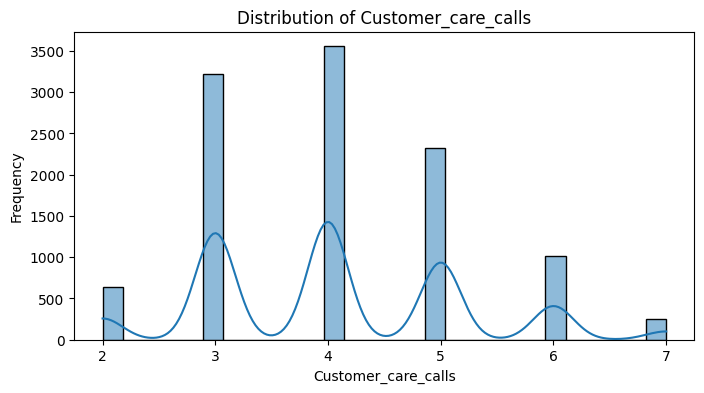

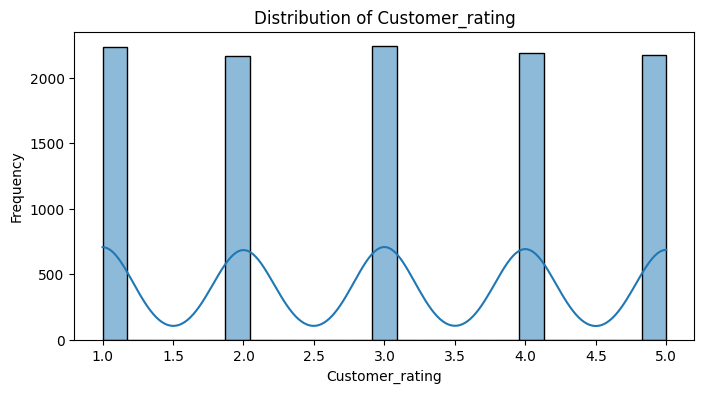

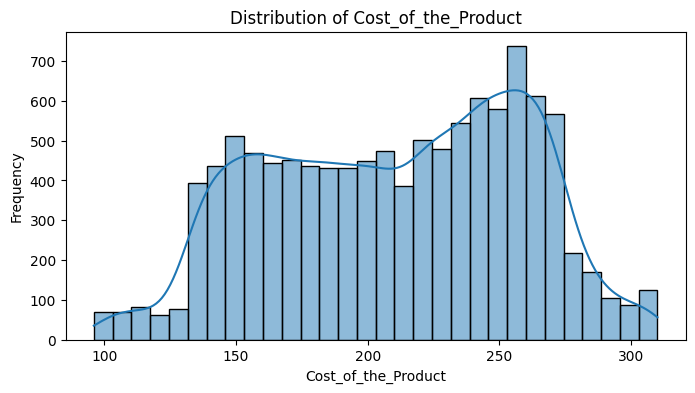

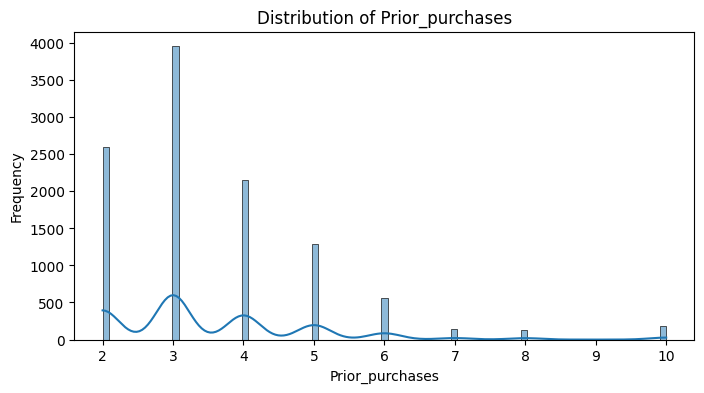

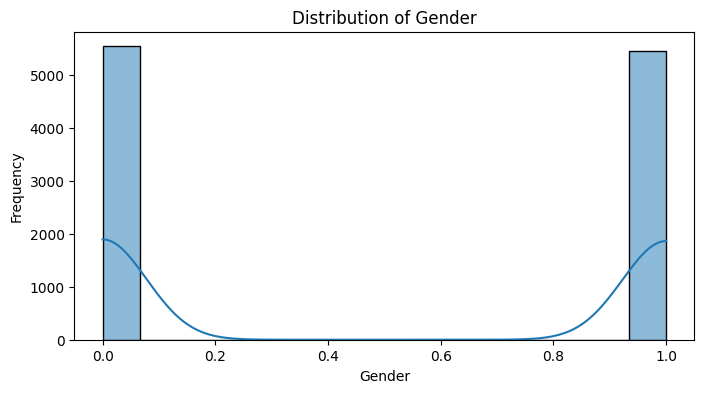

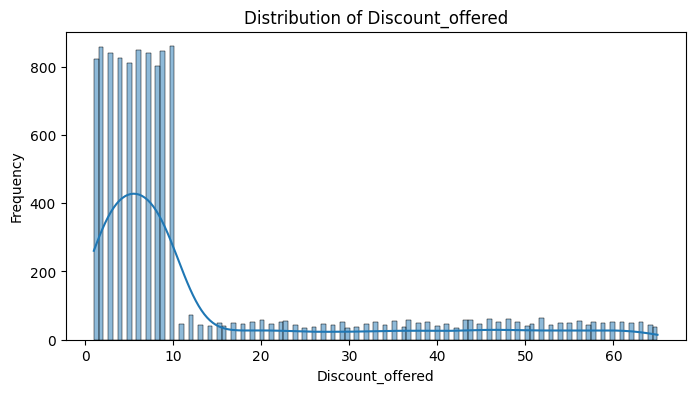

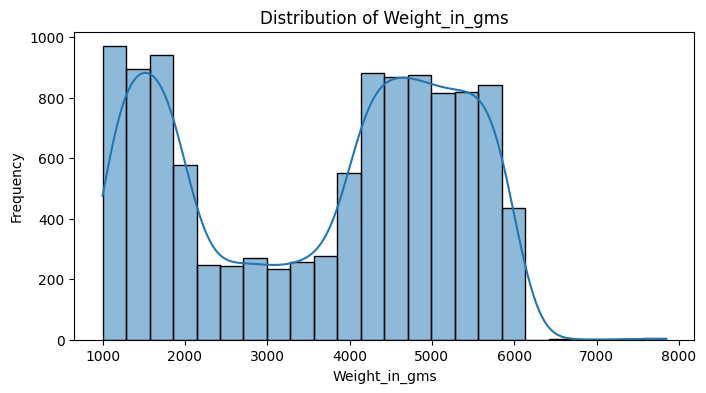

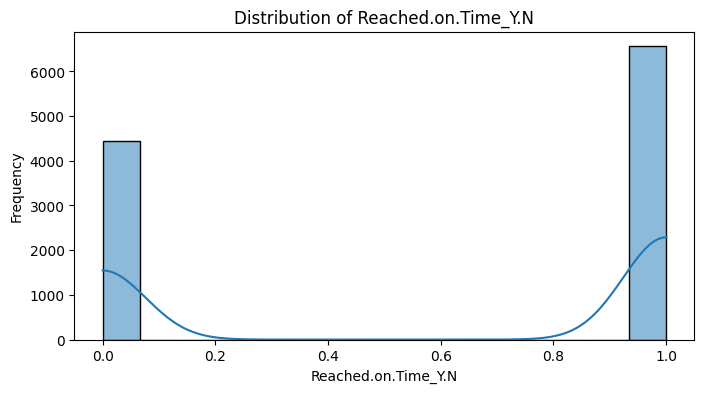

In [23]:
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

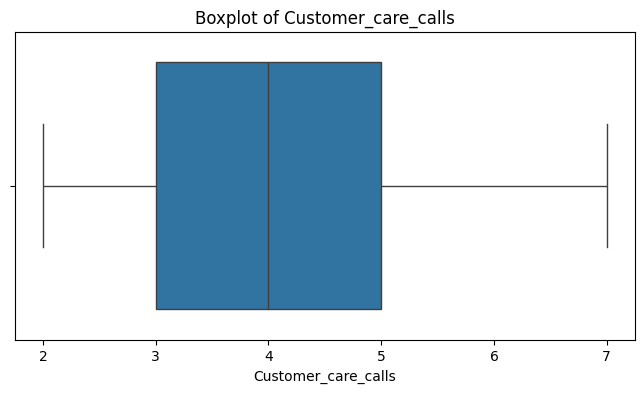

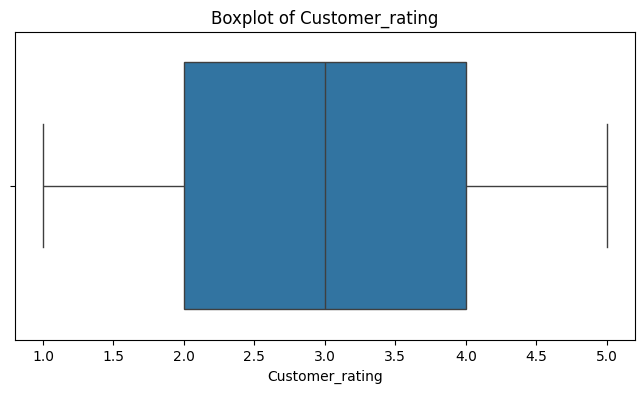

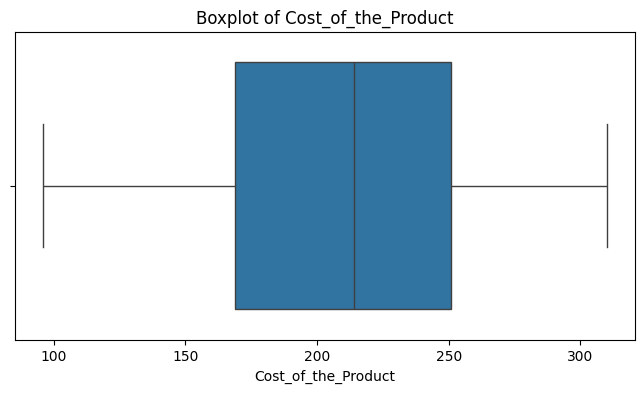

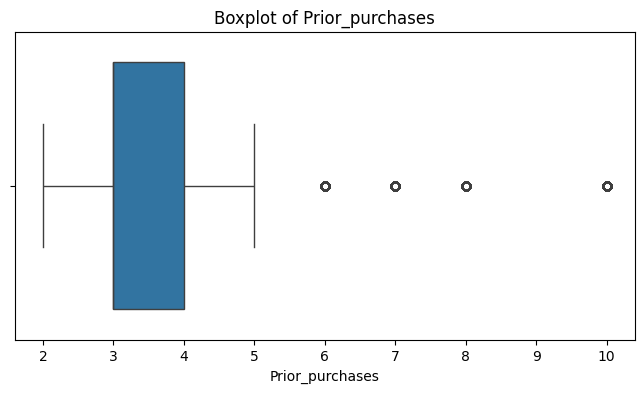

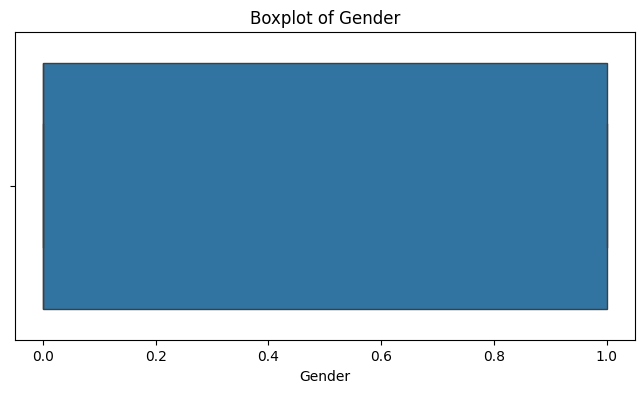

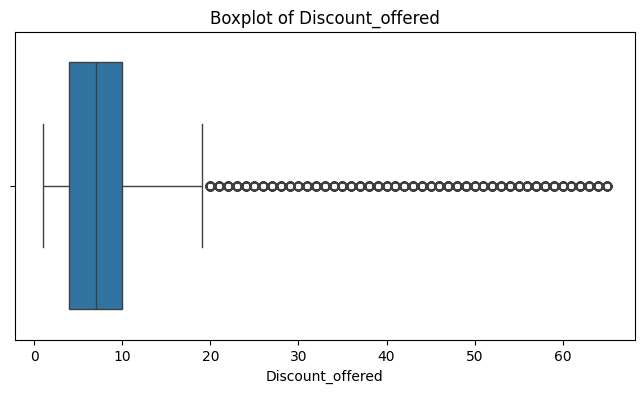

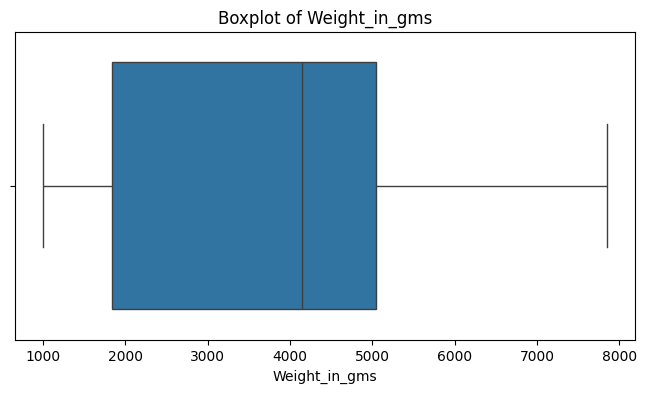

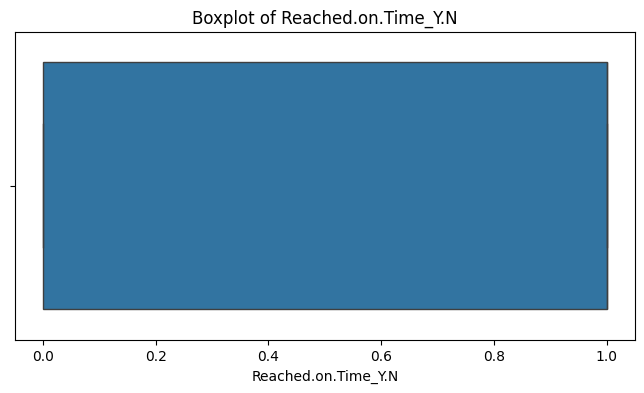

In [24]:
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [25]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Features:", categorical_features)

Categorical Features: ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance']


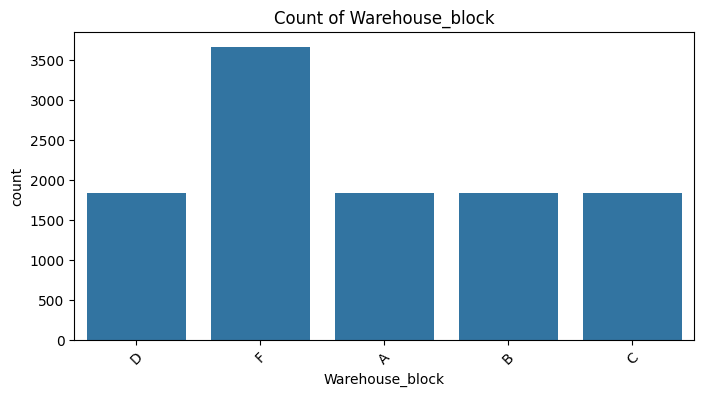

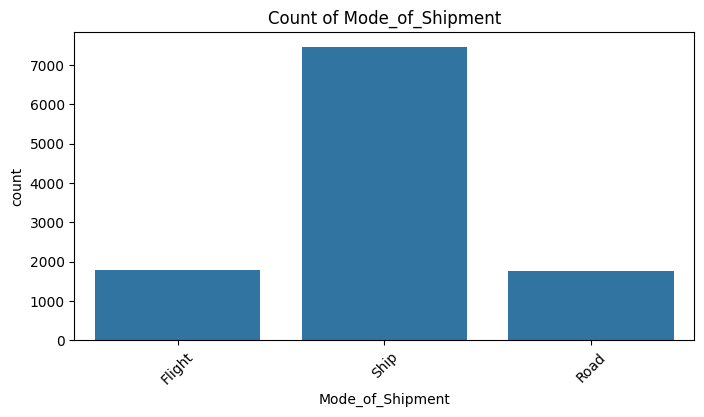

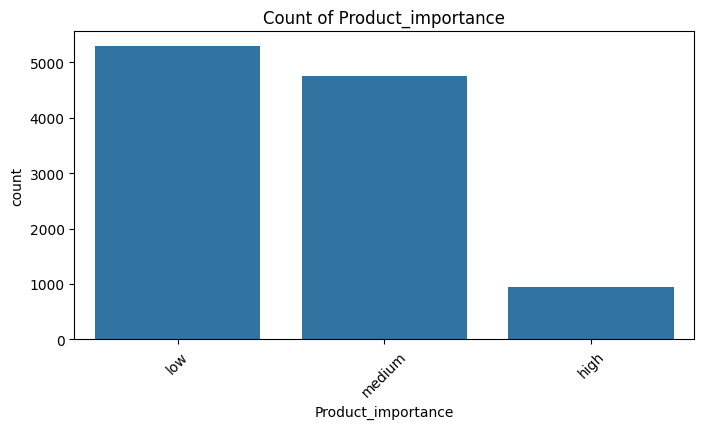

In [26]:
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

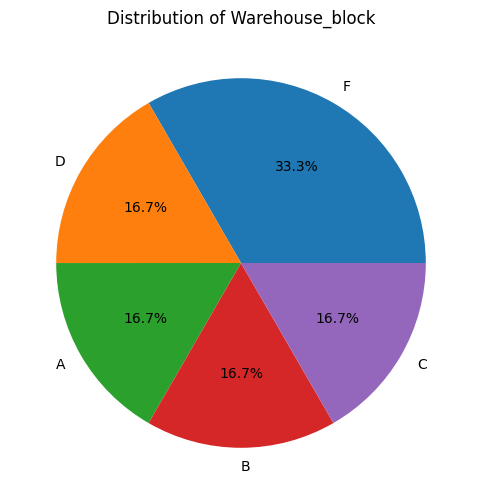

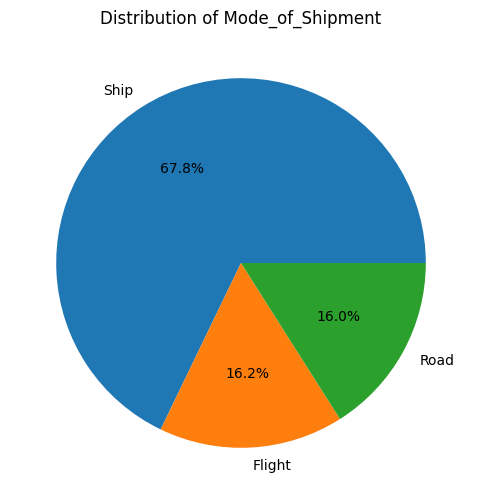

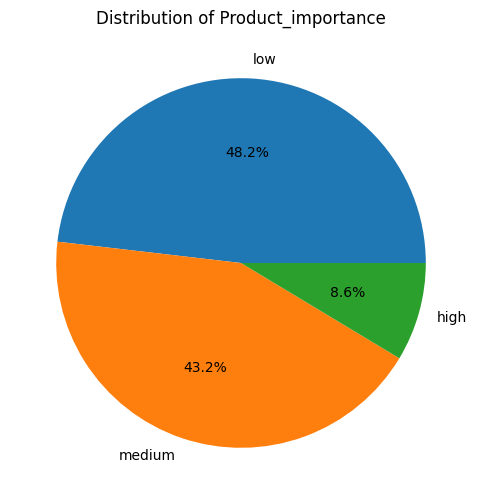

In [27]:
for col in categorical_features:
    plt.figure(figsize=(6, 6))
    df[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f'Distribution of {col}')
    plt.ylabel('')
    plt.show()

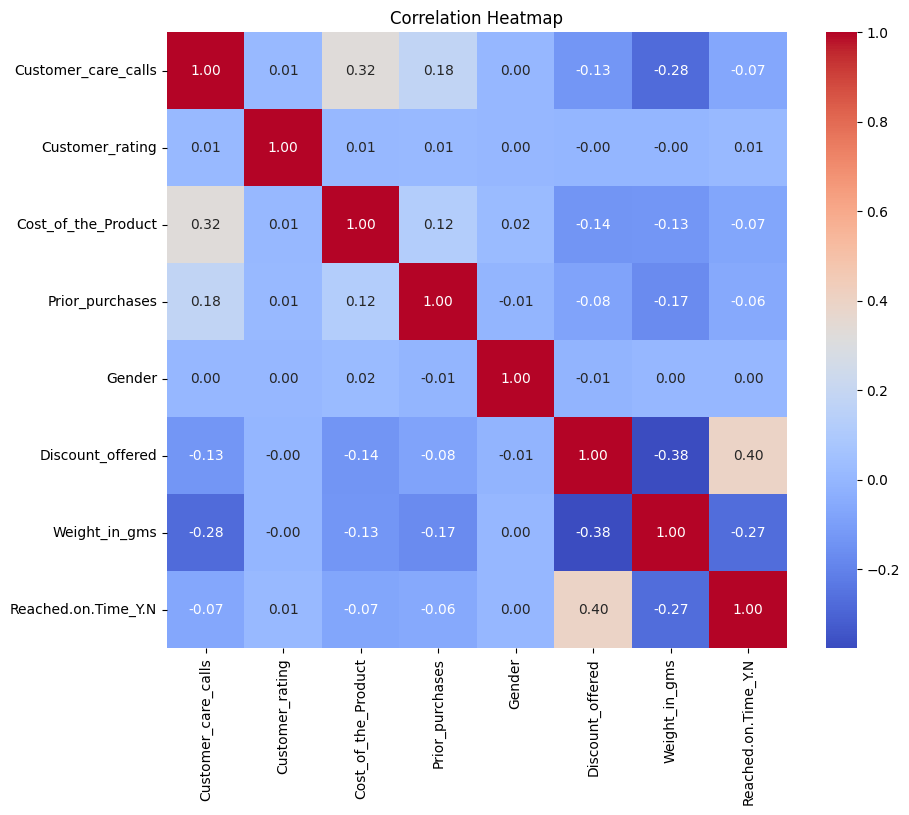

In [29]:
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [37]:
# Load dataset
df = pd.read_csv("E_Commerce.csv")

# Drop ID column if not useful
df = df.drop(columns=['ID'])

# One-hot encoding for categorical features
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate features and target
X = df.drop('Reached.on.Time_Y.N', axis=1)
y = df['Reached.on.Time_Y.N']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Logistic Regression Performance:
Accuracy: 0.6445, F1 Score: 0.7013
Confusion Matrix:


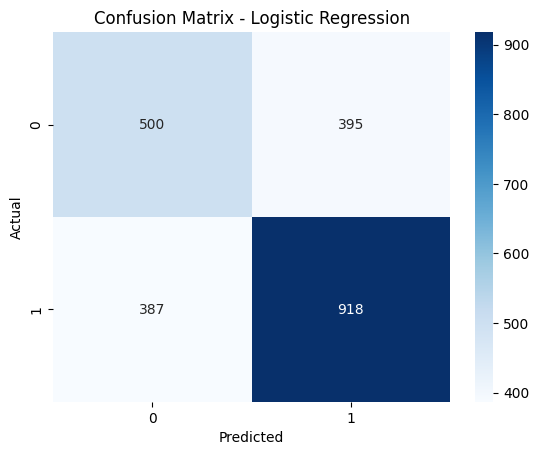

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.56      0.56       895
           1       0.70      0.70      0.70      1305

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200


Decision Tree Performance:
Accuracy: 0.6441, F1 Score: 0.7031
Confusion Matrix:


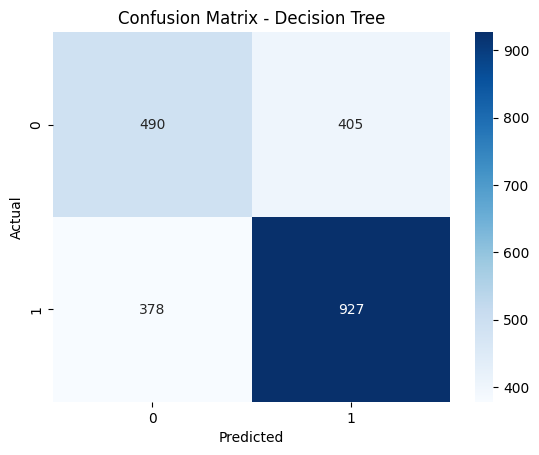

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.55      0.56       895
           1       0.70      0.71      0.70      1305

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200


Random Forest Performance:
Accuracy: 0.6636, F1 Score: 0.6975
Confusion Matrix:


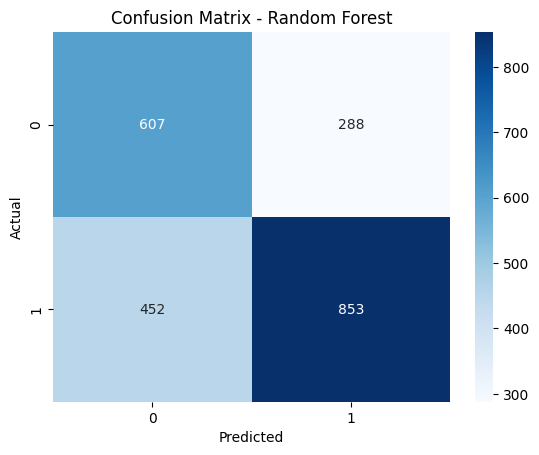

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.68      0.62       895
           1       0.75      0.65      0.70      1305

    accuracy                           0.66      2200
   macro avg       0.66      0.67      0.66      2200
weighted avg       0.68      0.66      0.67      2200



In [38]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the dataset
df = pd.read_csv("E_Commerce.csv")

# 2. Drop irrelevant columns
df = df.drop(columns=['ID'])

# 3. One-hot encode categorical features
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 4. Separate features and target
X = df.drop('Reached.on.Time_Y.N', axis=1)
y = df['Reached.on.Time_Y.N']

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Define and train models

# Logistic Regression with increased max_iter and scaling
log_reg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
log_reg.fit(X_train, y_train)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# 7. Predict on test set
y_pred_log_reg = log_reg.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

# 8. Evaluate models

def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{name} Performance:")
    print(f"Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

evaluate_model("Logistic Regression", y_test, y_pred_log_reg)
evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("Random Forest", y_test, y_pred_rf)

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [46]:
# Load dataset
df = pd.read_csv("E_Commerce.csv")

# Drop irrelevant columns
df = df.drop(columns=['ID'])

# One-hot encode categorical features
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features and target
X = df.drop('Reached.on.Time_Y.N', axis=1)
y = df['Reached.on.Time_Y.N']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
print(df.columns)


Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N', 'Warehouse_block_B', 'Warehouse_block_C',
       'Warehouse_block_D', 'Warehouse_block_F', 'Mode_of_Shipment_Road',
       'Mode_of_Shipment_Ship', 'Product_importance_low',
       'Product_importance_medium', 'Gender_M'],
      dtype='object')


In [48]:
# Define base models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

# Define parameter grids for each model
param_grids = {
    "Decision Tree": {
        'max_depth': [3, 5, 7, None],
        'min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'n_estimators': [50, 100],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5]
    },
    "KNN": {
        'n_neighbors': [3, 5, 7],
        'metric': ['euclidean', 'manhattan']
    }
}

In [49]:
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{name} - Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")
    return acc, f1

print("=== Untuned Model Performance ===")
untuned_results = {}

for name, model in models.items():
    if name == "KNN":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    acc, f1 = evaluate_model(name, y_test, y_pred)
    untuned_results[name] = (acc, f1)

=== Untuned Model Performance ===
Decision Tree - Accuracy: 0.6441, F1 Score: 0.7031
Random Forest - Accuracy: 0.6636, F1 Score: 0.6975
KNN - Accuracy: 0.6277, F1 Score: 0.6792


In [50]:
from sklearn.model_selection import GridSearchCV

tuned_models = {}
tuned_results = {}

print("\n=== Tuning Models ===")

for name, model in models.items():
    param_grid = param_grids[name]

    # Use scaled data only for KNN
    if name == "KNN":
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
        grid_search.fit(X_train_scaled, y_train)
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test_scaled)
    else:
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)

    tuned_models[name] = best_model
    acc, f1 = evaluate_model(f"{name} (Tuned)", y_test, y_pred)
    tuned_results[name] = (acc, f1)
    print(f"Best Parameters for {name}: {grid_search.best_params_}")


=== Tuning Models ===
Decision Tree (Tuned) - Accuracy: 0.6459, F1 Score: 0.6993
Best Parameters for Decision Tree: {'max_depth': None, 'min_samples_split': 5}
Random Forest (Tuned) - Accuracy: 0.6645, F1 Score: 0.6980
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
KNN (Tuned) - Accuracy: 0.6291, F1 Score: 0.6808
Best Parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 3}



=== Performance Comparison ===
        Model  Untuned Accuracy  Untuned F1  Tuned Accuracy  Tuned F1
Decision Tree          0.644091    0.703072        0.645909  0.699344
Random Forest          0.663636    0.697465        0.664545  0.698036
          KNN          0.627727    0.679201        0.629091  0.680751


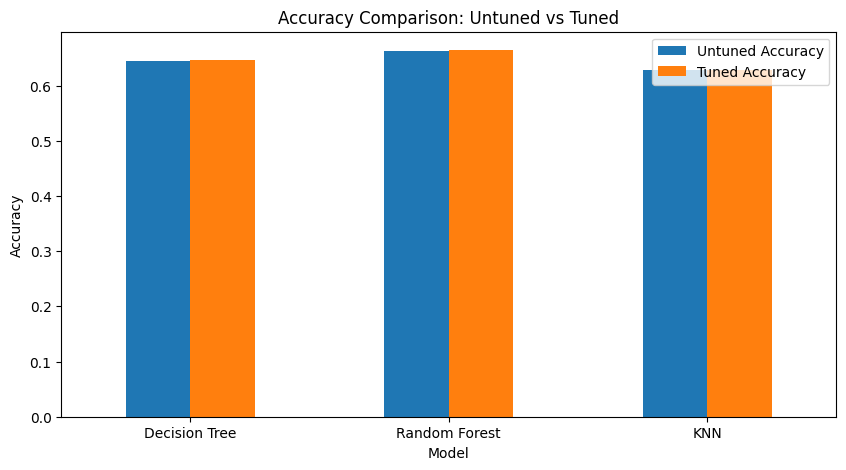

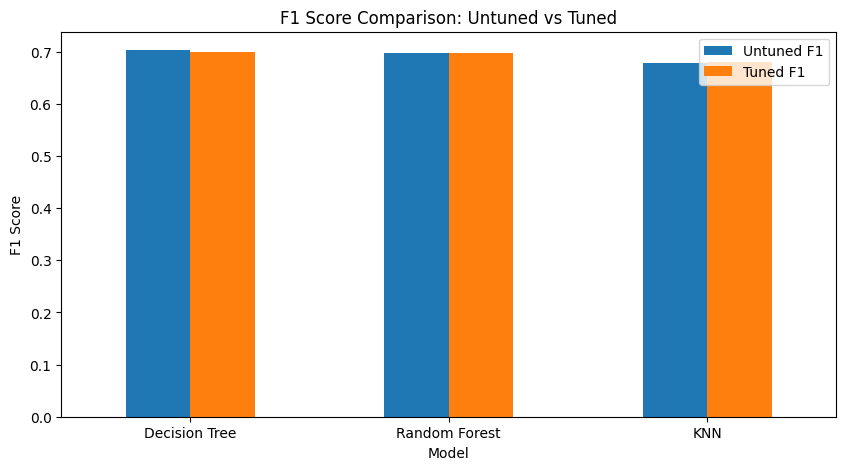

In [51]:
comparison = []
for name in models.keys():
    u_acc, u_f1 = untuned_results[name]
    t_acc, t_f1 = tuned_results[name]
    comparison.append([name, u_acc, u_f1, t_acc, t_f1])

comparison_df = pd.DataFrame(comparison, columns=[
    'Model', 'Untuned Accuracy', 'Untuned F1', 'Tuned Accuracy', 'Tuned F1'
])
print("\n=== Performance Comparison ===")
print(comparison_df.to_string(index=False))

# Plot comparison
comparison_df.set_index('Model')[['Untuned Accuracy', 'Tuned Accuracy']].plot(kind='bar', figsize=(10,5))
plt.title('Accuracy Comparison: Untuned vs Tuned')
plt.ylabel('Accuracy')
plt.xticks(rotation=0)
plt.show()

comparison_df.set_index('Model')[['Untuned F1', 'Tuned F1']].plot(kind='bar', figsize=(10,5))
plt.title('F1 Score Comparison: Untuned vs Tuned')
plt.ylabel('F1 Score')
plt.xticks(rotation=0)
plt.show()